In [81]:
#import
import pandas as pd
import numpy as np
import datetime as dt
import statsmodels.api as sm
import matplotlib as plt
%matplotlib inline
import seaborn
seaborn.set_style('darkgrid')

## Prepare Data

In [72]:
import pymongo
host='47.103.52.183'
port=27017
username="test"
password="123123"
role = "admin"
mongo_uri = "mongodb://%s:%s@%s:%s/%s" % (username, password, host, port, role)
conn = pymongo.MongoClient(mongo_uri)
db = conn['futureData']

In [73]:
def read_mongo(db,collection, query={},projection={},no_id=True,limit = 10):
    """ Read from Mongo and Store into DataFrame. """

    #return db[collection]
    cursor = db[collection].find(filter=query,projection= projection).limit(limit)
    
    # Expand the cursor and construct the DataFrame
    df = pd.DataFrame(list(cursor))
    #df.to_csv("abc.csv", encoding="utf_8_sig")  # 处理中文乱码问题

    if no_id:
        del df['_id']

    return df
def standard_data(df):
    
    return df.set_index('recordTime').resample('500ms').last().ffill().sort_index(ascending=False)

In [74]:
projection = {
              'InstrumentID':1,'TradingDay':1,'UpdateTime':1,
              'recordTime':1,'BidPrice1':1,'BidVolume1':1,
              'AskPrice1':1,'AskVolume1':1,'LastPrice':1
             }
query = {
    "recordTime":{"$gte":dt.datetime(2019,5,9,9,0,0)}
}
leg1 = standard_data(read_mongo(db,collection='IC1905',query=query,projection=projection,limit=40000))
leg2 = standard_data(read_mongo(db,collection='IC1909',query=query,projection=projection,limit=40000))

In [75]:
con1 = leg1.index > dt.datetime(2019,5,9,9,31,0) 
con2 = leg1.index < dt.datetime(2019,5,9,11,31,0)
ana_leg1 = leg1[np.logical_and(con1,con2)]


con1 = leg2.index > dt.datetime(2019,5,9,9,31,0) 
con2 = leg2.index < dt.datetime(2019,5,9,11,31,0)
ana_leg2 = leg2[np.logical_and(con1,con2)]

In [80]:
ana_leg2

,AskPrice1,AskVolume1,BidPrice1,BidVolume1,InstrumentID,LastPrice,TradingDay,UpdateTime
recordTime,,,,,,,,
2019-05-09 11:30:59.500,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:59.000,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:58.500,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:58.000,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:57.500,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:57.000,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:56.500,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:56.000,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58
2019-05-09 11:30:55.500,4709.6,1.0,4700.0,5.0,IC1909,4703.6,20190509,11:29:58


In [76]:
result = ana_leg1.LastPrice - ana_leg2.LastPrice

In [77]:
std_result = (result - result.mean()) / result.std()

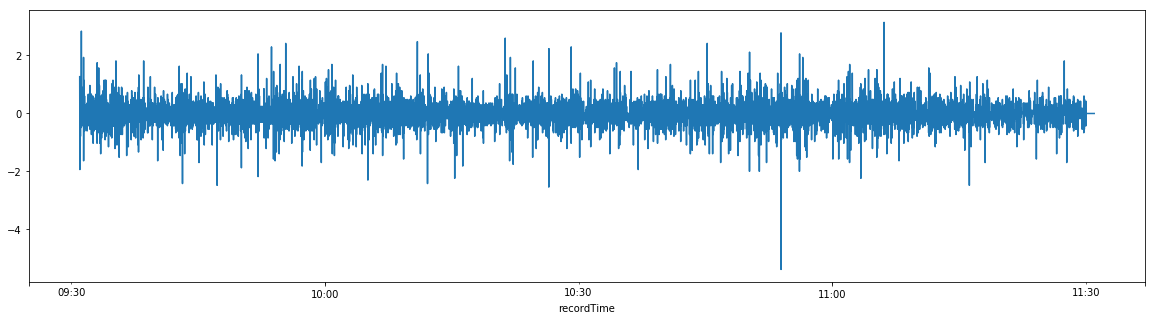

In [78]:
std_result.diff(1).plot(figsize = (20,5))

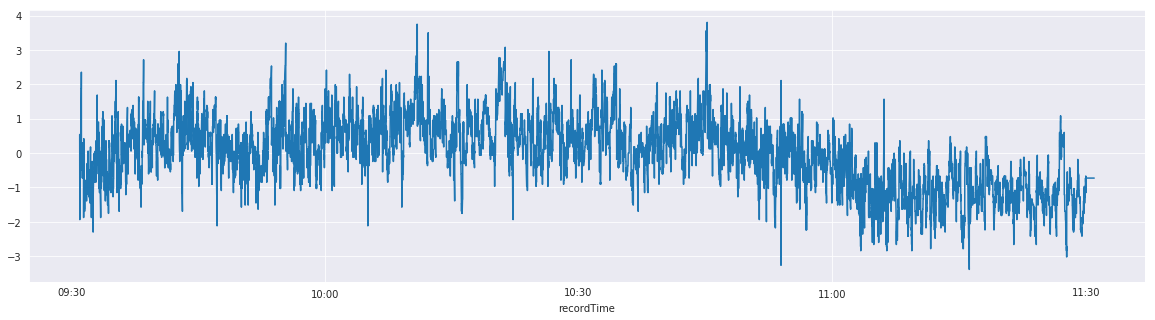

In [82]:
std_result.plot(figsize = (20,5))

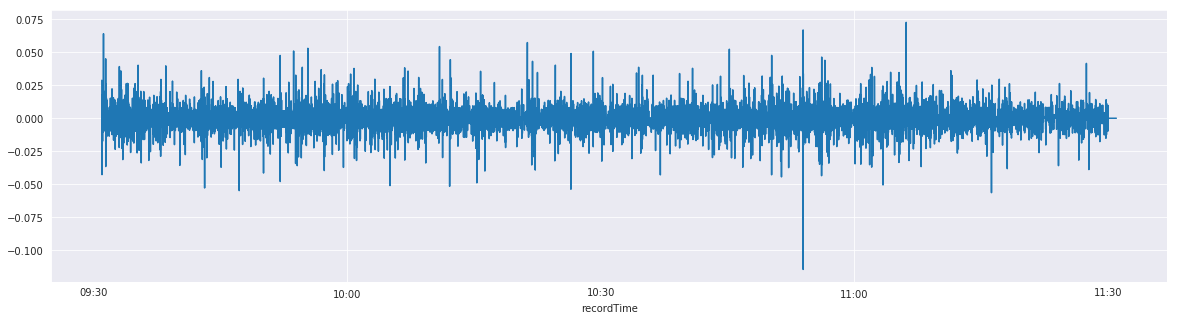

In [88]:
returns = result.pct_change().dropna()
figure = returns.plot(figsize = (20,5))

In [90]:
from arch import arch_model

am = arch_model(returns)
res = am.fit(update_freq = 5)
print res.summary()

Inequality constraints incompatible    (Exit mode 4)
            Current function value: -50961.8907661
            Iterations: 1
            Function evaluations: 6
            Gradient evaluations: 1
                     Constant Mean - GARCH Model Results                      
Dep. Variable:              LastPrice   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                50961.9
Distribution:                  Normal   AIC:                          -101916.
Method:            Maximum Likelihood   BIC:                          -101885.
                                        No. Observations:                14398
Date:                Mon, May 13 2019   Df Residuals:                    14394
Time:                        10:30:30   Df Model:                            4
                                  Mean Model                                 
         

/home/tao/anaconda2/lib/python2.7/site-packages/arch/univariate/base.py:571: ConvergenceWarning: 
The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  ConvergenceWarning)


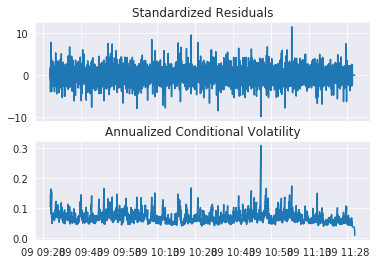

In [97]:

fig = res.plot(annualize='D',scale=100)

In [98]:
ana_leg1

,AskPrice1,AskVolume1,BidPrice1,BidVolume1,InstrumentID,LastPrice,TradingDay,UpdateTime
recordTime,,,,,,,,
2019-05-09 11:30:59.500,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:59.000,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:58.500,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:58.000,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:57.500,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:57.000,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:56.500,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:56.000,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
2019-05-09 11:30:55.500,4849.2,4.0,4846.6,5.0,IC1905,4849.2,20190509,11:30:00
